## Рассмотрим пример реализации метода роения частиц в задаче оптимизации функции полезности

Данный метод используется для поиска глобального экстремума многопараметрической функции. Идея алгоритма была частично заимствована из исследований поведения скоплений животных (косяков рыб, стай птиц и т.п.), модель была немного упрощена и добавлены элементы поведения толпы людей.

Блок-схема алгоритма:

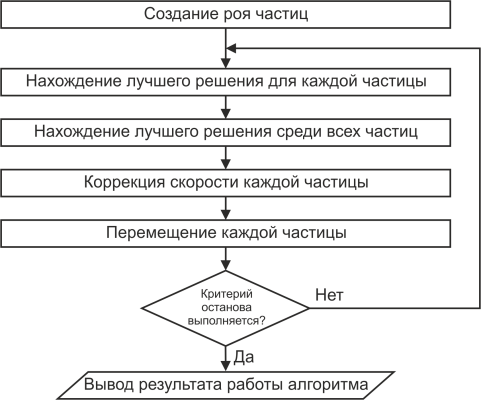

Чтобы понять алгоритм роя частиц, представим себе n-мерное пространство (область поиска), в котором рыщут частицы (агенты алгоритма). В начале частицы разбросаны случайным образом по всей области поиска, и каждая частица имеет случайный вектор скорости. В каждой точке, где побывала частица, рассчитывается значение целевой функции. При этом каждая частица запоминает, какое (и где) лучшее значение целевой функции она лично нашла, а также каждая частица знает где расположена точка, являющаяся лучшей среди всех точек, которые разведали частицы. На каждой итерации частицы корректируют свою скорость (модуль и направление), чтобы с одной стороны быть поближе к лучшей точке, которую частица нашла сама (авторы алгоритма назвали этот аспект поведения "ностальгией"), и, в то же время, приблизиться к точке, которая в данный момент является глобально лучшей. Через некоторое количество итераций частицы должны собраться вблизи наиболее хорошей точки, хотя возможно, что часть частиц останется где-то в относительно неплохом локальном экстремуме, но главное, чтобы хотя бы одна частица оказалась вблизи глобального экстремума.

Источник: https://jenyay.net/Programming/ParticleSwarm

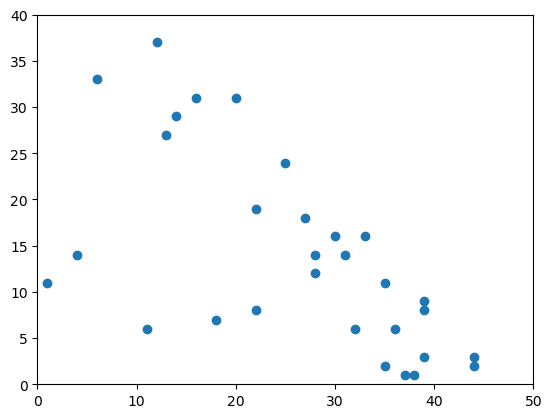

In [1]:
import random
from matplotlib import pyplot as plt

# продукты первого вида, т.е. первые координаты "частицы"
x1 = [12,44,27,38,18,30,28,44,6,1,37,22,39,35,13,32,39,28,36,31,11,4,20,14,25,39,22,16,35,33]

# продукты второго вида, т.е. вторые координаты "частицы"
x2 = [37,3,18,1,7,16,14,2,33,11,1,8,8,11,27,6,9,12,6,14,6,14,31,29,24,3,19,31,2,16]

# расположение точек на координатной плоскости
plt.scatter(x1, x2)
plt.xlim(0, 50)
plt.ylim(0, 40)
plt.show()

In [7]:
# Функция полезности (подлежит максимизации) U = xx1**a * xx2**b, a+b=1
def f_poleznosti(xx1, xx2):
    a = 0.875                        # Показатель степени у первого продукта
    b = 1 - a                        # Показатель степени у второго продукта
    return pow(xx1,a) * pow(xx2,b)


# Количество частиц
N = 30

# координаты собственной наилучшей позиции каждой частицы
x1_pers = [12,44,27,38,18,30,28,44,6,1,37,22,39,35,13,32,39,28,36,31,11,4,20,14,25,39,22,16,35,33]
x2_pers = [37,3,18,1,7,16,14,2,33,11,1,8,8,11,27,6,9,12,6,14,6,14,31,29,24,3,19,31,2,16]

# значения персонального наилучшего значения полезности
U_pers = list()
for xx1, xx2 in zip(x1_pers, x2_pers):
    U_pers.append(f_poleznosti(xx1, xx2))

# координаты глобальной наилучшей позиции
x1_global = 0
x2_global = 0

# значение функции полезности в глобальной наилучшей позиции
U_max = f_poleznosti(x1_global, x2_global)


#функция для обновления глобальной позиции
def check_global(U_max, x1_global, x2_global):
    for (x, y) in zip(x1_pers, x2_pers):
        if U_max < f_poleznosti(x, y):
            U_max = f_poleznosti(x, y)
            x1_global = x
            x2_global = y
    return U_max, x1_global, x2_global

U_max, x1_global, x2_global = check_global(U_max, x1_global, x2_global)

print(f'Максимум функции, равный {U_max}, достигается в точках {x1_global, x2_global}')

Максимум функции, равный 32.468471556693146, достигается в точках (39, 9)


Применим метод роения частиц

После алгоритма роения частиц максимум функции, равный 42.65086247567158, достигается в точках (55.59940731345365, 6.66701462757619)


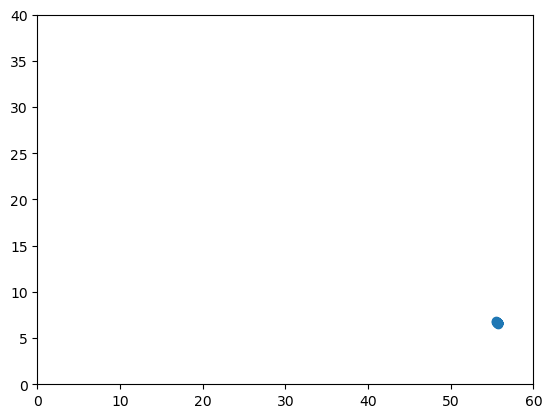

In [26]:
# Параметры для запуска метода роения частиц
alpha = 0.95
beta = 0.2
gamma = 0.2

ksi1 = random.random()
ksi2 = random.random()

# скорости частиц в начальный момент времени (задаются случайно)
v1 = list()
v2 = list()

for i in range(30):
    v1.append(random.uniform(0, 2))
    v2.append(random.uniform(0, 2))

# количество шагов метода роения частиц
L = 100

#Основной цикл метода роения частиц
for i in range(L):
  #print(i)
    for j in range(N):
        v1[j] = alpha*v1[j] + beta*ksi1*(x1_pers[j] - x1[j]) + gamma*ksi2*(x1_global-x1[j])
        v2[j] = alpha*v2[j] + beta*ksi1*(x2_pers[j] - x2[j]) + gamma*ksi2*(x2_global-x2[j])
        x1[j] = x1[j] + v1[j]
        x2[j] = x2[j] + v2[j]
        f = f_poleznosti(x1[j], x2[j])
        #print(type(f))
        '''if isinstance(f, float) == False:  # если результат функции является комплексным числом
            f = float(cf.real)'''
        if (U_pers[j] < float(f_poleznosti(x1[j], x2[j]))):
            if (5*x1[j] + 6*x2[j]) <= 318:
                x1_pers[j] = x1[j]
                x2_pers[j] = x2[j]
                U_pers[j] = f_poleznosti(x1[j], x2[j])
        U_max, x1_global, x2_global = check_global(U_max, x1_global, x2_global)

print(f'После алгоритма роения частиц максимум функции, равный {U_max}, достигается в точках {x1_global, x2_global}')

plt.scatter(x1, x2)
plt.xlim(0, 60)
plt.ylim(0, 40)
plt.show()

Как мы видим, экстремум функции увеличился.  
Рассмотрим в увеличенном масштабе.

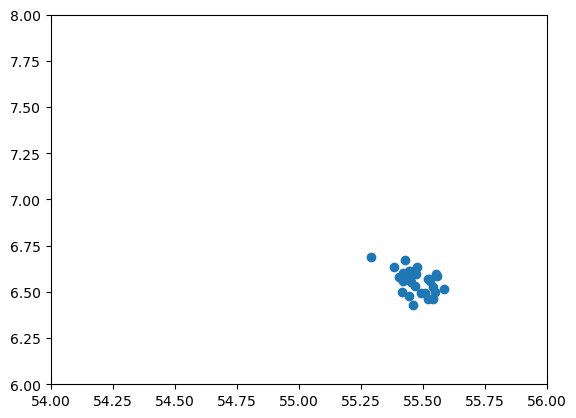

In [22]:
plt.scatter(x1, x2)
plt.xlim(54, 56)
plt.ylim(6, 8)
plt.show()